# "Health and world economical growth"
> "The case study consists of analysis of migration patterns of three birds"

- toc: false
- branch: master
- badges: true
- comments: true
- categories: [case-study, markdown, R]
- image: images/vignette/gapminder.png
- hide: false
- search_exclude: true

# Abstract
The objective of this case study is to understand the change in World Health and Economics using Data Visualization, EDA, and Summarization. In this study two main questions, *Is it a fair characterization of today's world to say that it is divided into a Westorn Rich Nations (Europian Countries, USA et cetera), and Developing Countries (Asia, Africa et cetera)? Has the **Income Inequality** worsened during the last 40 years?* The study involves data from Gapminder Foundation about trends in world health and economics. Study emphasizes the use of data visualization to better understand the trends and insights. This study is purely based on the Gapminder TED talks **New Insights on poverty**

# Load and explore data

In [3]:
library(dslabs)
library(tidyverse)
library(ggthemes)
library(ggrepel)
data(gapminder)
gapminder %>% head()
str(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


'data.frame':	10545 obs. of  9 variables:
 $ country         : Factor w/ 185 levels "Albania","Algeria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ year            : int  1960 1960 1960 1960 1960 1960 1960 1960 1960 1960 ...
 $ infant_mortality: num  115.4 148.2 208 NA 59.9 ...
 $ life_expectancy : num  62.9 47.5 36 63 65.4 ...
 $ fertility       : num  6.19 7.65 7.32 4.43 3.11 4.55 4.82 3.45 2.7 5.57 ...
 $ population      : num  1636054 11124892 5270844 54681 20619075 ...
 $ gdp             : num  NA 1.38e+10 NA NA 1.08e+11 ...
 $ continent       : Factor w/ 5 levels "Africa","Americas",..: 4 1 1 2 2 3 2 5 4 3 ...
 $ region          : Factor w/ 22 levels "Australia and New Zealand",..: 19 11 10 2 15 21 2 1 22 21 ...


**Data consists of 10545 Observations and 9 Variables**, it consists of varibles like *country*, *region*, health outcomes (*life_expectancy*, *fertility*), economic aspects (*gdp*), 
**Add gdp_cp var i.e. gdp per capita which represents the wealth of a country**

In [4]:
# Add gdp_cp var i.e. gdp per capita which represents wealth of a country
gapminder <- gapminder %>% mutate(gdp_pc = gdp / population, dollars_per_day = gdp_pc/365)
head(gapminder)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region,gdp_pc,dollars_per_day
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe,NA,NA
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa,1242.992,3.405458
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa,NA,NA
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean,NA,NA
Argentina,1960,59.87,65.39,3.11,20619075,108322326649,Americas,South America,5253.501,14.393153
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia,NA,NA


# Analysis
## Infant Mortality
Getting started with testing our knowledge regarding differences in infant mortality across differnt countries, for each of the pairs of countries given below, **Which country do you think had the highest child mortality rate in 2015?** and **Which pairs do you think are the most similar?**

|Country1 |Country2|
|---------|--------|
|Sri Lanka|Turkey  |
|Poland|South Korea|
|Malaysia|Russia|
|Pakistan|Vietnam|
|Thialand|South Africa|

It is commonly percieved that the non-europian countries like Sri Lanka, South Korea have higher mortality rates than their Europian counterparts. Also the developing countries like Pakistan are considered to have high mortality rates. Lets take a look at the data to see whether it is just a superstition or a fact.

In [5]:
mortality <- gapminder %>%
    filter(year == 2015 & country %in% c("Sri Lanka", "Turkey")) %>%
    select(country, infant_mortality)
mortality <- cbind(mortality[1,], mortality[2,])
mortality <- mortality[-2,]

mortality1 <- gapminder %>%
    filter(year == 2015 & country %in% c("Poland","South Korea")) %>%
    select(country, infant_mortality)
mortality1 <- cbind(mortality1[1,], mortality1[2,])
mortality1 <- mortality1[-2,]

mortality2 <- gapminder %>%
    filter(year == 2015 & country %in% c("Malaysia","Russia")) %>%
    select(country, infant_mortality)
mortality2 <- cbind(mortality2[1,], mortality2[2,])
mortality2 <- mortality2[-2,]

mortality3 <- gapminder %>%
    filter(year == 2015 & country %in% c("Pakistan","Vietnam")) %>%
    select(country, infant_mortality)
mortality3 <- cbind(mortality3[1,], mortality3[2,])
mortality3 <- mortality3[-2,]

mortality4 <- gapminder %>%
    filter(year == 2015 & country %in% c("Thailand","South Africa")) %>%
    select(country, infant_mortality)
mortality4 <- cbind(mortality4[1,], mortality4[2,])
mortality4 <- mortality4[-2,]
rbind.data.frame(mortality,mortality1,mortality2,mortality3,mortality4)

country,infant_mortality,country,infant_mortality
Sri Lanka,8.4,Turkey,11.6
South Korea,2.9,Poland,4.5
Malaysia,6.0,Russia,8.2
Pakistan,65.8,Vietnam,17.3
South Africa,33.6,Thailand,10.5


In [6]:
countries <- c("Sri Lanka","Turkey","Poland","South Korea","Malaysia","Russia","Pakistan","Vietnam","Thailand","South Africa")
mortality <- data.frame()
for (i in seq(1,10,2)) {
    mortality1 <- gapminder %>%
        filter(year == 2015 & country %in% countries[c(i,i+1)]) %>%
        select(country, infant_mortality)
    mortality1 <- cbind(mortality1[1,], mortality1[2,])
    mortality1 <- mortality1[-2,]
    mortality <- rbind.data.frame(mortality,mortality1)
}
mortality

country,infant_mortality,country,infant_mortality
Sri Lanka,8.4,Turkey,11.6
South Korea,2.9,Poland,4.5
Malaysia,6.0,Russia,8.2
Pakistan,65.8,Vietnam,17.3
South Africa,33.6,Thailand,10.5


We see that the European countries on this list have higher child mortality rates: Poland
has a higher rate than South Korea, and Russia has a higher rate than Malaysia. We also
see that Pakistan has a much higher rate than Vietnam, and South Africa has a much
higher rate than Thailand. The reason for this stems from the preconceived notion that the world is divided into two
groups: the western world (Western Europe and North America), characterized by long
life spans and small families, versus the developing world (Africa, Asia, and Latin America)
characterized by short life spans and large families.

## Life Expectancy, Fertility
scatterplot of life expectancy versus
fertility rates (average number of children per woman) 50 years ago

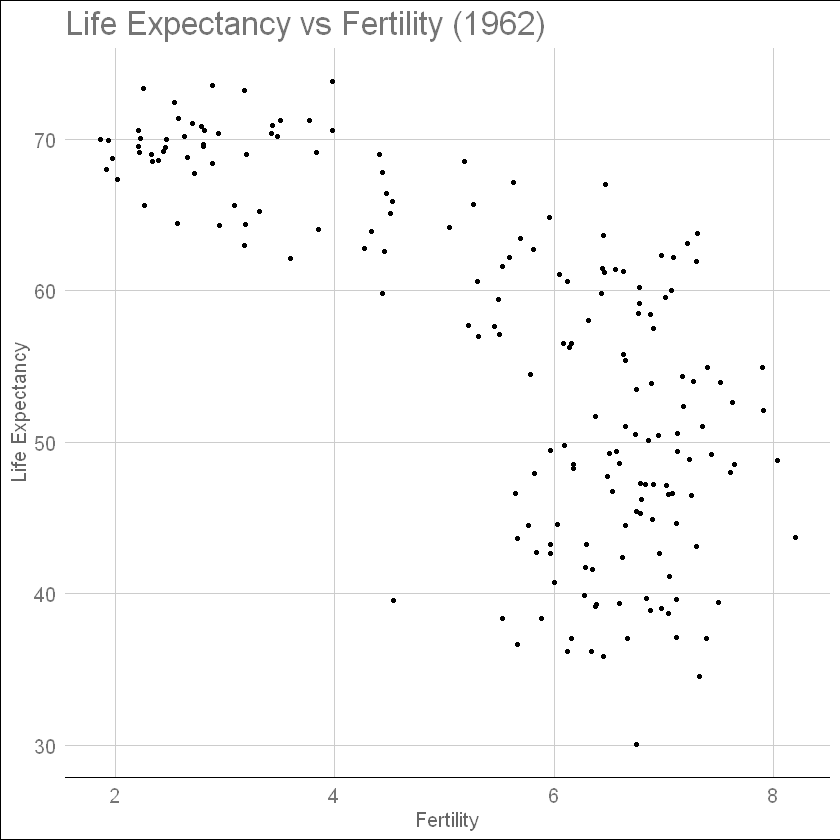

In [7]:
#basic scatterplot of life expectancy versus fertility in year 1962
ds_theme_set()
gapminder %>%
    filter(year == 1962) %>%
    ggplot(aes(fertility, life_expectancy)) +
    geom_point(size = 1) +
    ylab("Life Expectancy") +
    xlab("Fertility") +
    ggtitle("Life Expectancy vs Fertility (1962)") +
    theme_gdocs()

Most points fall into two distinct categories: Life expectancy around 70 years and 3 or fewer children per family, and Life expectancy lower than 65 years and more than 5 children per family.

To confirm that indeed these countries are from the regions we expect, we can use color to
represent continent.

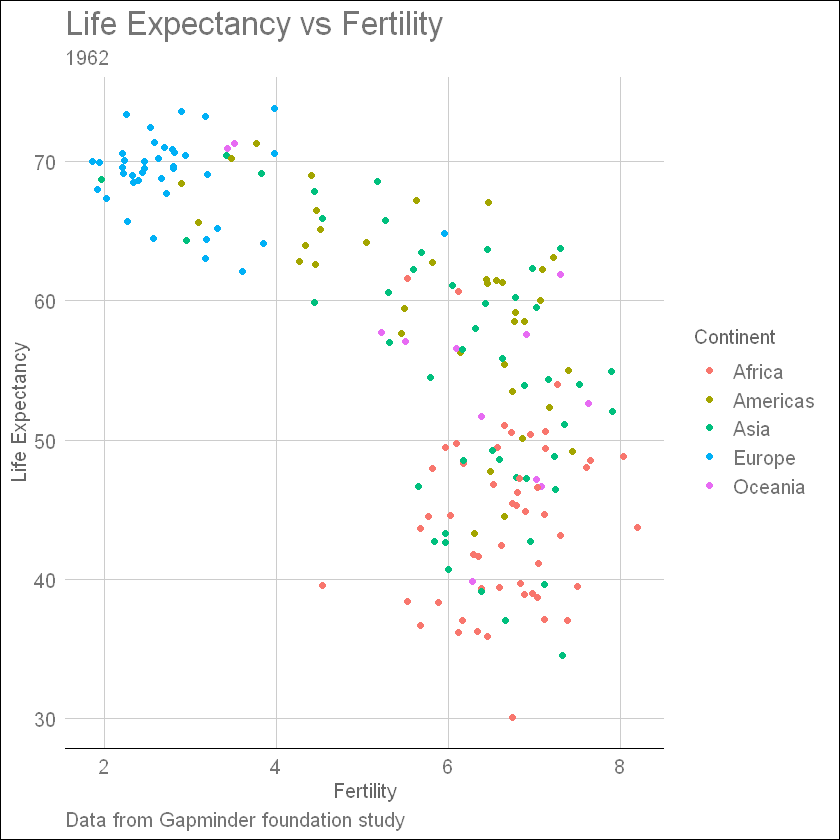

In [8]:
# Add color based on continent
gapminder %>%
    filter(year == 1962) %>%
    ggplot(aes(fertility, life_expectancy, color = continent)) +
    geom_point() +
    labs(title = "Life Expectancy vs Fertility",
         subtitle = "1962",
         caption = "Data from Gapminder foundation study",
         x = "Fertility",
         y = "Life Expectancy",
         color = "Continent") +
    theme_gdocs()

In 1962, “the West versus developing world” view was grounded in some reality. Is this still
the case 50 years later?

## Changes over time
Facet life expectancy vs fertility by continent and year to see how it changed from 1962 to 2012 for different continents using side-by-side plots

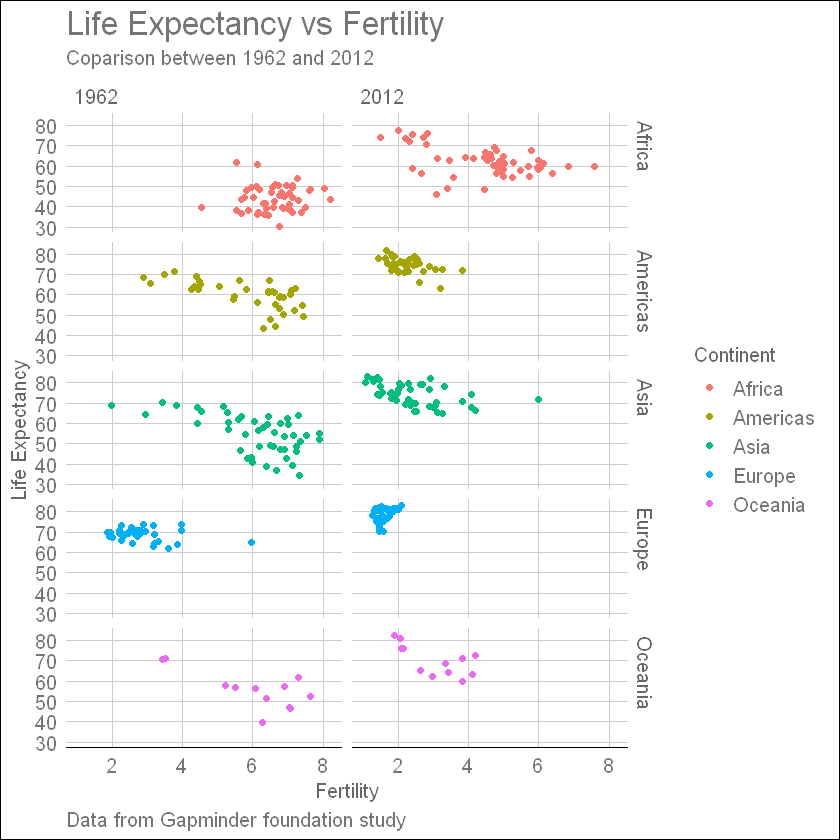

In [9]:
gapminder %>%
    filter(year %in% c(1962, 2012)) %>%
    ggplot(aes(fertility, life_expectancy, color = continent)) +
    geom_point() +
    facet_grid(continent ~ year) +
    labs(title = "Life Expectancy vs Fertility",
         subtitle = "Coparison between 1962 and 2012",
         caption = "Data from Gapminder foundation study",
         x = "Fertility",
         y = "Life Expectancy",
         color = "Continent") +
    theme_gdocs()

Except for countries in Africa continent almost all of the countries had significant increase in life expectancy and reduced fertility and Europian countries has the most significant increase of all thus **It's quite clear from the plot, notion that Europian and American countries have a higher life-expectancy is somewhat correct

## Facet by year only

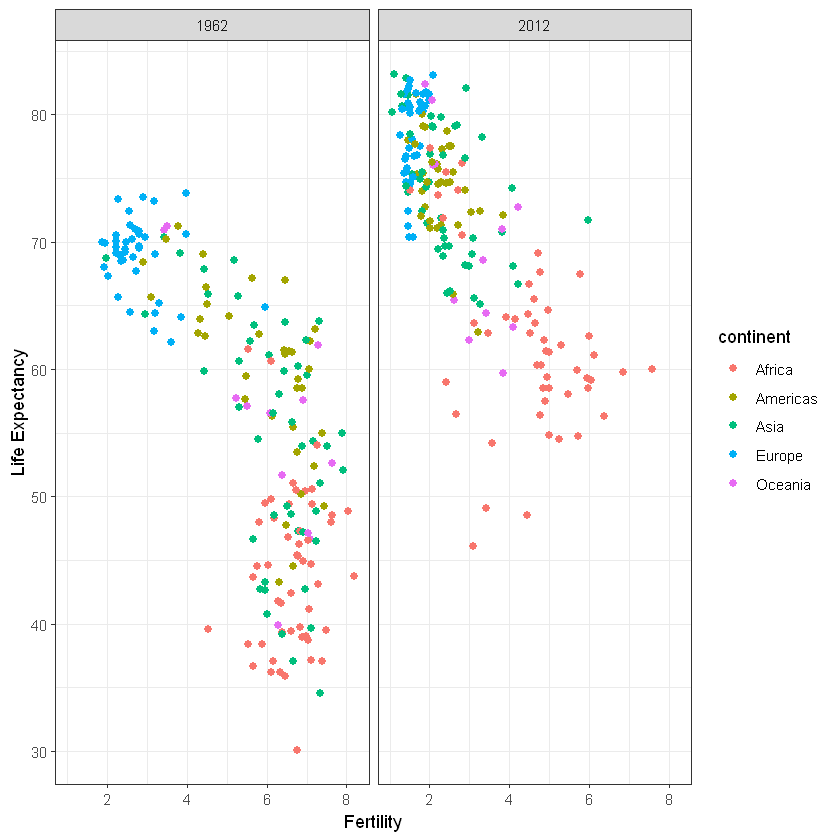

In [10]:
gapminder %>% filter(year %in% c("1962", "2012")) %>%
    ggplot(aes(fertility, life_expectancy, col = continent)) +
    geom_point(size = 2) +
    facet_grid(.~ year) +
    ylab("Life Expectancy") +
    xlab("Fertility")

Faceting by year 1962 and 2012 shows, though all of the countries had a increase in life-expectancy, European and American countries had the highest life-expectancy.
This plot clearly shows that the majority of countries have moved from the developing world
cluster to the western world one. In 2012, the western versus developing world view no
longer makes sense. This is particularly clear when comparing Europe to Asia, the latter of
which includes several countries that have made great improvements.


**Facet by year, plots wrapped onto multiple rows to see changes over the years in life-expectancy** to explore how this transformation happened through the years, we can make the plot for
several years. This plot clearly shows how most Asian countries have improved at a much faster rate than
European ones.


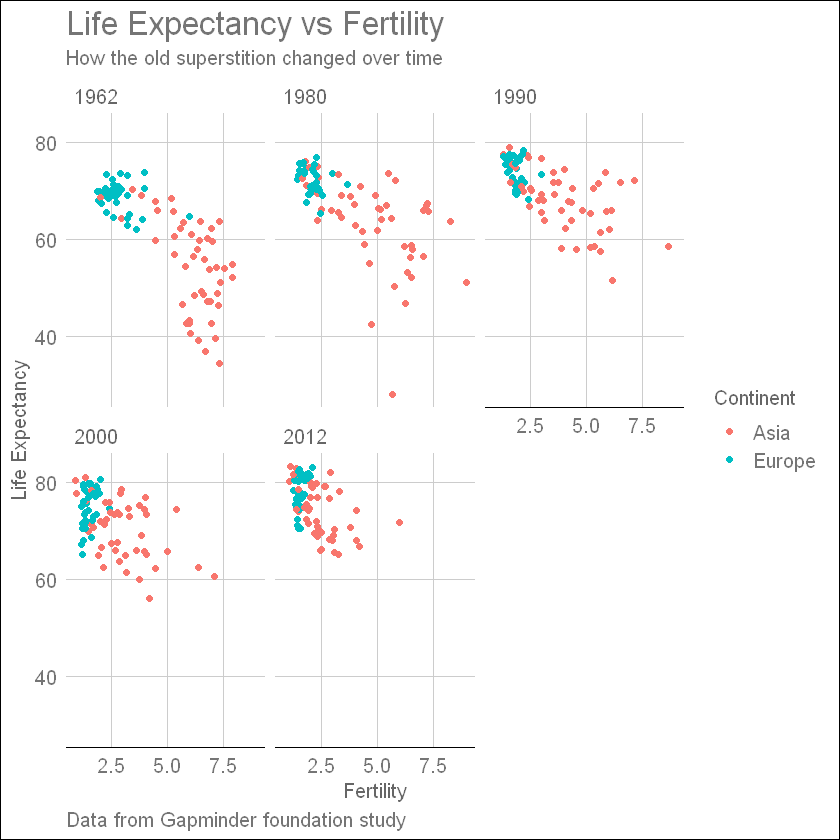

In [11]:
gapminder %>%
    filter(year %in% c(1962, 1980, 1990, 2000, 2012), continent %in% c("Asia", "Europe")) %>%
    ggplot(aes(fertility, life_expectancy, color = continent)) +
    geom_point() +
    facet_wrap(~year) +
    labs(title = "Life Expectancy vs Fertility",
         subtitle = "How the old superstition changed over time",
         caption = "Data from Gapminder foundation study",
         x = "Fertility",
         y = "Life Expectancy",
         color = "Continent") +
    theme_gdocs()

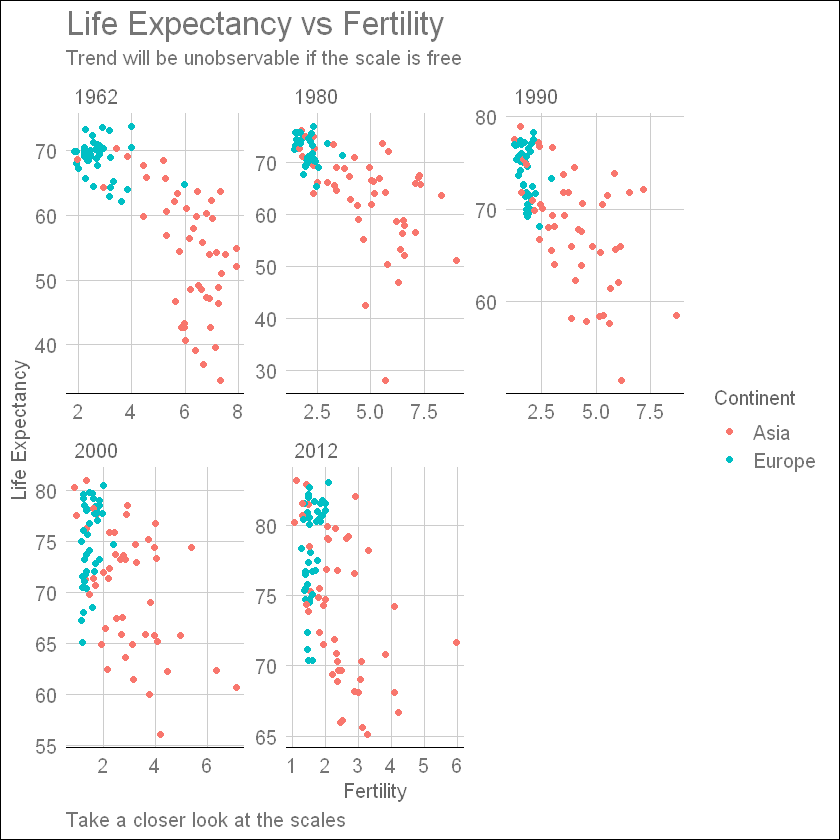

In [12]:
gapminder %>%
    filter(year %in% c(1962, 1980, 1990, 2000, 2012), continent %in% c("Asia", "Europe")) %>%
    ggplot(aes(fertility, life_expectancy, color = continent)) +
    geom_point() +
    facet_wrap(~year, scales = "free") +
    labs(title = "Life Expectancy vs Fertility",
         subtitle = "Trend will be unobservable if the scale is free",
         caption = "Take a closer look at the scales",
         x = "Fertility",
         y = "Life Expectancy",
         color = "Continent") +
    theme_gdocs()

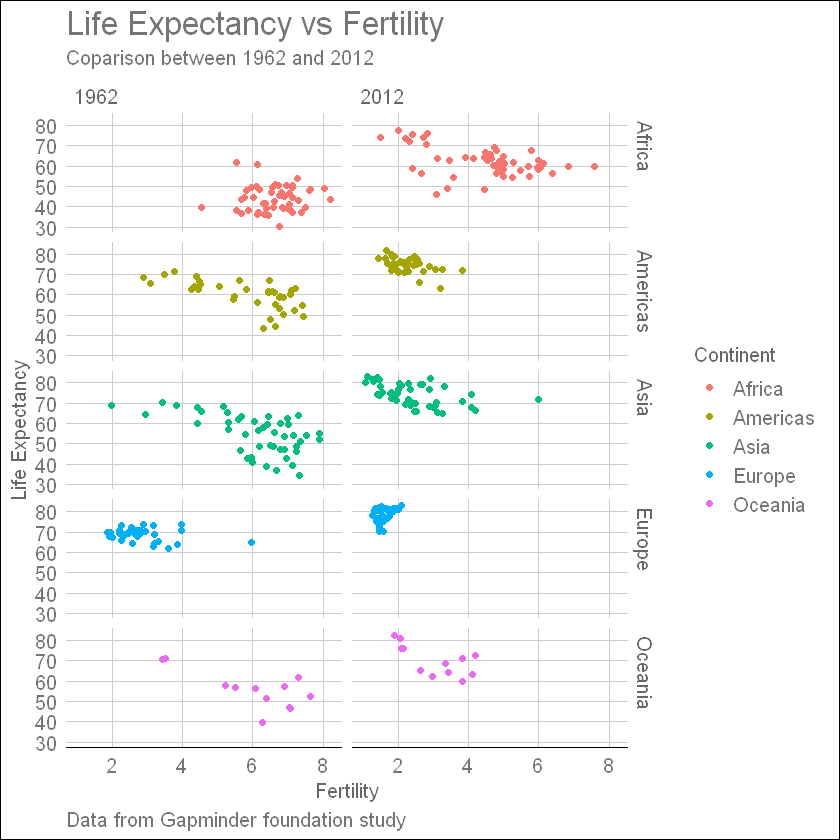

In [13]:
gapminder %>%
    filter(year %in% c(1962, 2012)) %>%
    ggplot(aes(fertility, life_expectancy, color = continent)) +
    geom_point() +
    facet_grid(continent ~ year) +
    labs(title = "Life Expectancy vs Fertility",
         subtitle = "Coparison between 1962 and 2012",
         caption = "Data from Gapminder foundation study",
         x = "Fertility",
         y = "Life Expectancy",
         color = "Continent") +
    theme_gdocs()

# Time Series Analysis
The visualizations above effectively illustrate that data no longer supports the western versus
developing world view. Once we see these plots, new questions emerge. For example, which
countries are improving more and which ones less? Was the improvement constant during
the last 50 years or was it more accelerated during certain periods? For a closer look that
may help answer these questions, we are going to use time series plots.

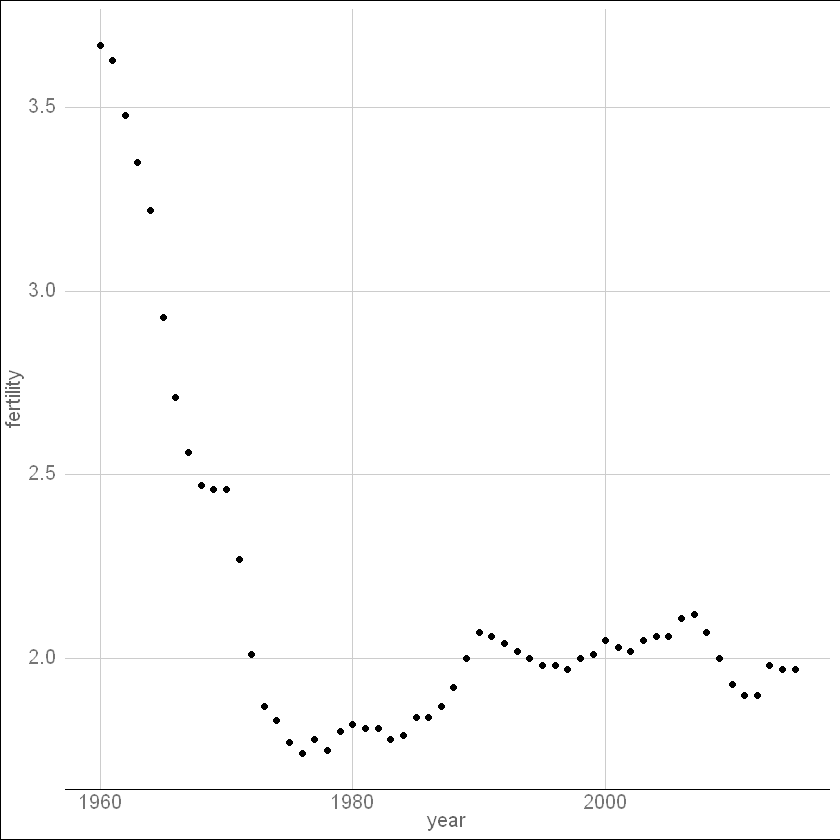

In [14]:
# scatterplot of US fertility by year
gapminder %>%
    filter(country == "United States", !is.na(fertility)) %>%
    ggplot(aes(year, fertility)) +
    geom_point() +
    theme_gdocs()

We see that the trend is not linear at all. Instead there is sharp drop during the 1960s and
1970s to below 2. Then the trend comes back to 2 and stabilizes during the 1990s.
When the points are regularly and densely spaced, as they are here, we create curves by
joining the points with lines, to convey that these data are from a single series, here a
country.

## Line plot - US fertility

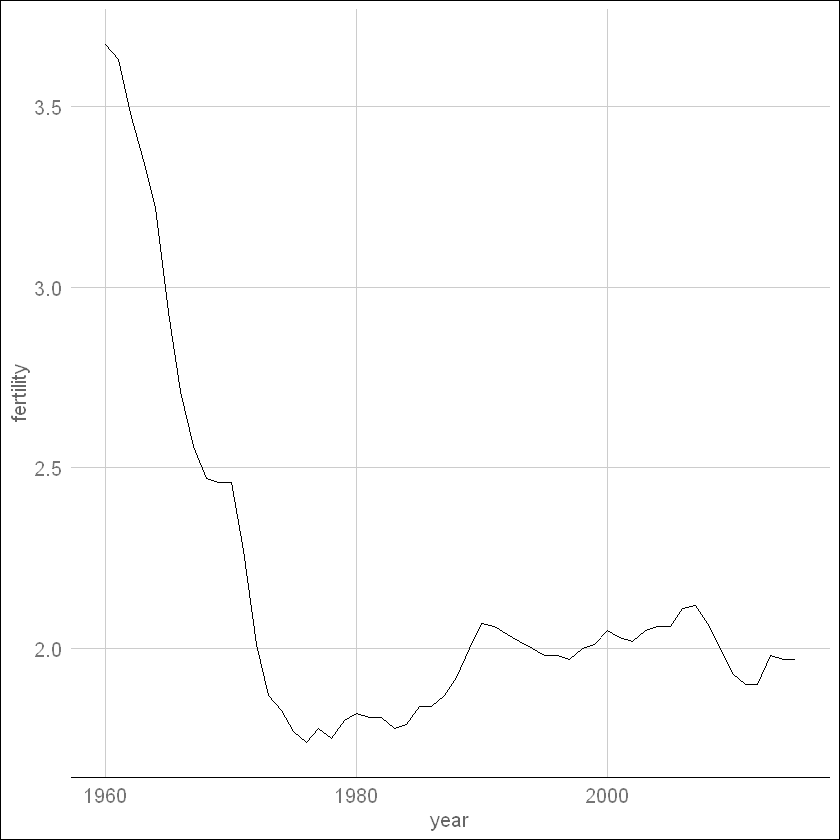

In [15]:
# line plot of US fertility by year
gapminder %>%
    filter(country == "United States", !is.na(fertility)) %>%
    ggplot(aes(year, fertility)) +
    geom_line() +
    theme_gdocs()

## Line plot - Korea and Germany
This is particularly helpful when we look at two countries. If we subset the data to include
two countries, one from Europe and one from Asia.

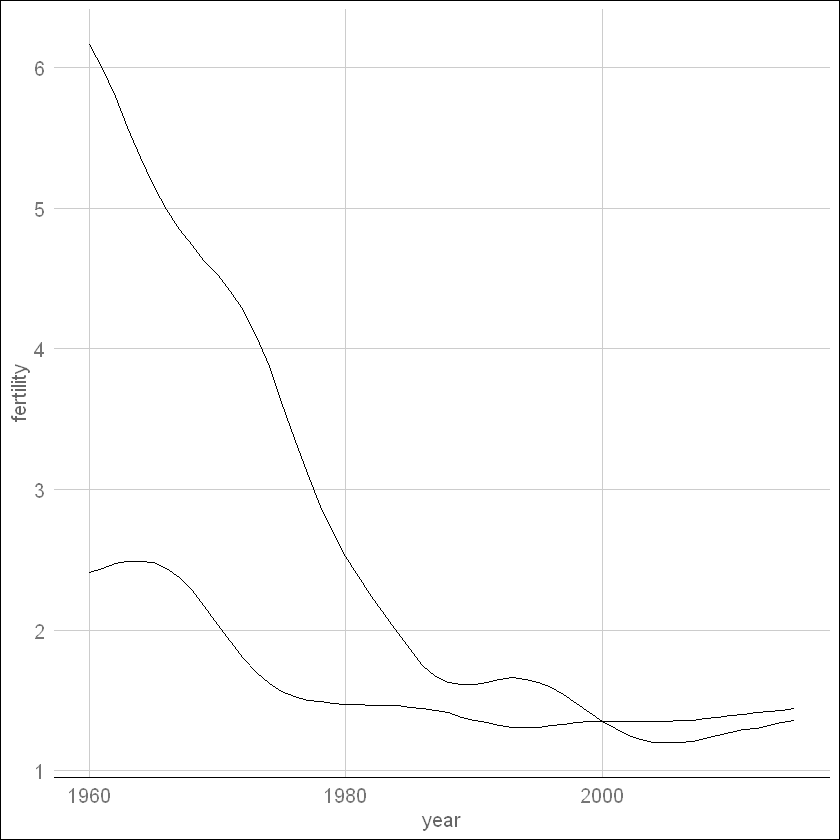

In [16]:
countries <- c("South Korea", "Germany")
gapminder %>% filter(country %in% countries & !is.na(fertility)) %>%
    ggplot(aes(year, fertility, group = country)) +
    geom_line() +
    theme_gdocs()

The plot clearly shows how South Korea’s fertility rate dropped drastically during the 1960s
and 1970s, and by 1990 had a similar rate to that of Germany.


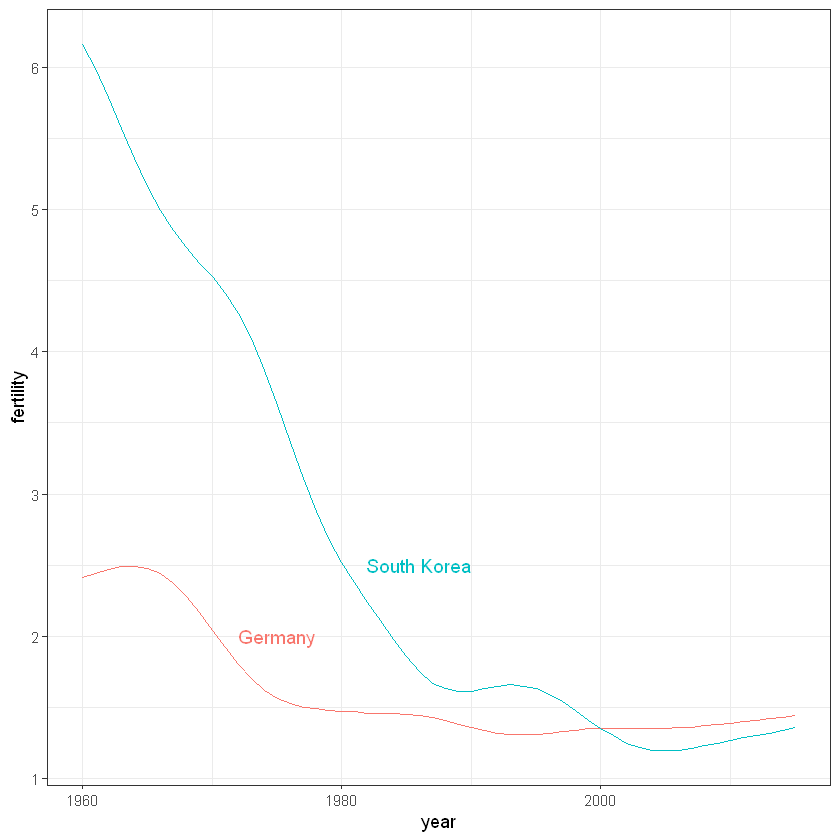

In [17]:
labels <- data.frame(country = countries, x = c(1986, 1975), y = c(2.5,2.0))
gapminder %>% filter(country %in% countries & !is.na(fertility)) %>%
    ggplot(aes(year, fertility, col = country)) +
    geom_text(data = labels, aes(x, y, label = country), size = 4) +
    theme(legend.position = "none") +
    geom_line()

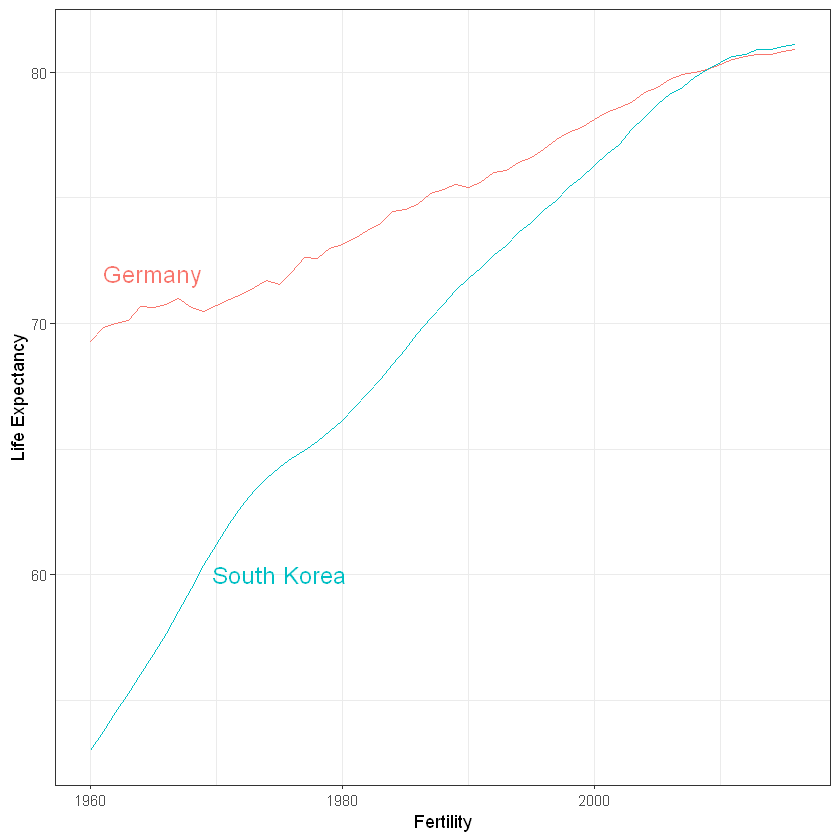

In [18]:
# life expectancy time series - lines colored by country and labeled, no legend
labels <- data.frame(country = countries, x = c(1975, 1965), y = c(60, 72))
gapminder %>% filter(country %in% countries) %>%
    ggplot(aes(year, life_expectancy, col = country)) +
    geom_line() +
    geom_text(data = labels, aes(x, y, label = country), size = 5) +
    theme(legend.position = "none") +
    ylab("Life Expectancy") +
    xlab("Fertility")

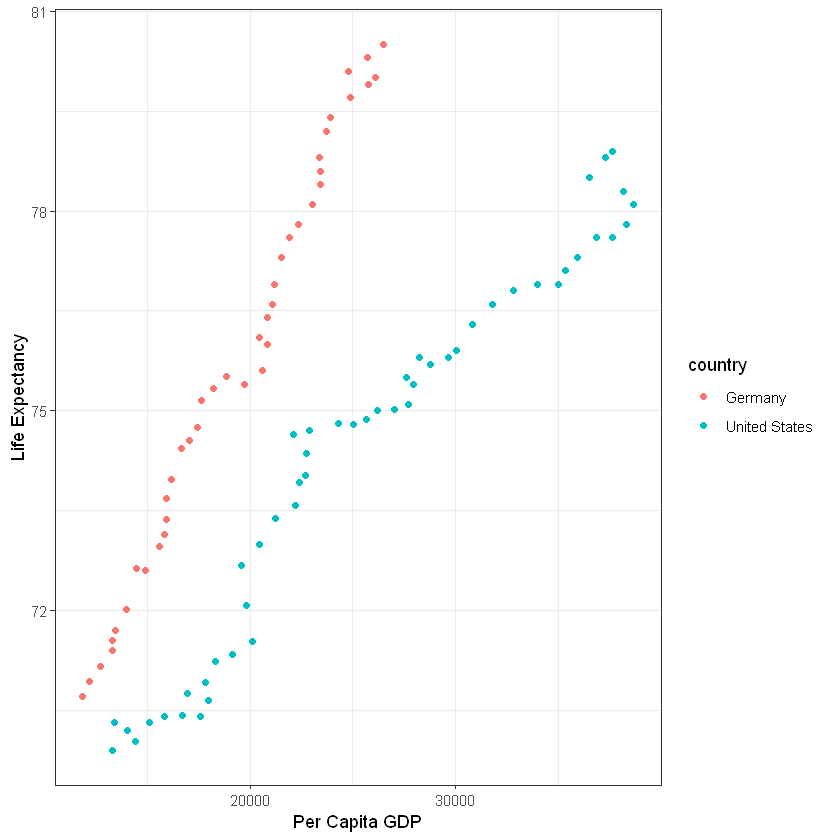

In [19]:
countries <- c("Germany", "United States")
gapminder %>%
    filter(country %in% countries & !is.na(gdp_pc)) %>%
    ggplot(aes(gdp_pc, life_expectancy, col = country)) +
    geom_point() +
    xlab("Per Capita GDP") +
    ylab("Life Expectancy")

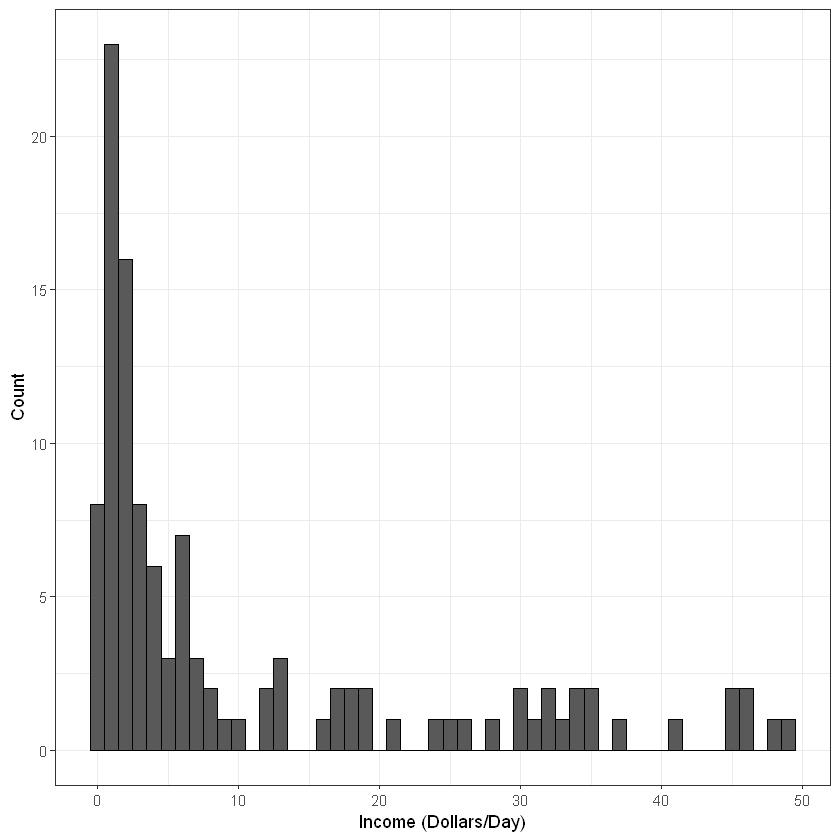

In [20]:
past_year <- 1970
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, col = "black") +
    xlab("Income (Dollars/Day)") +
    ylab("Count")

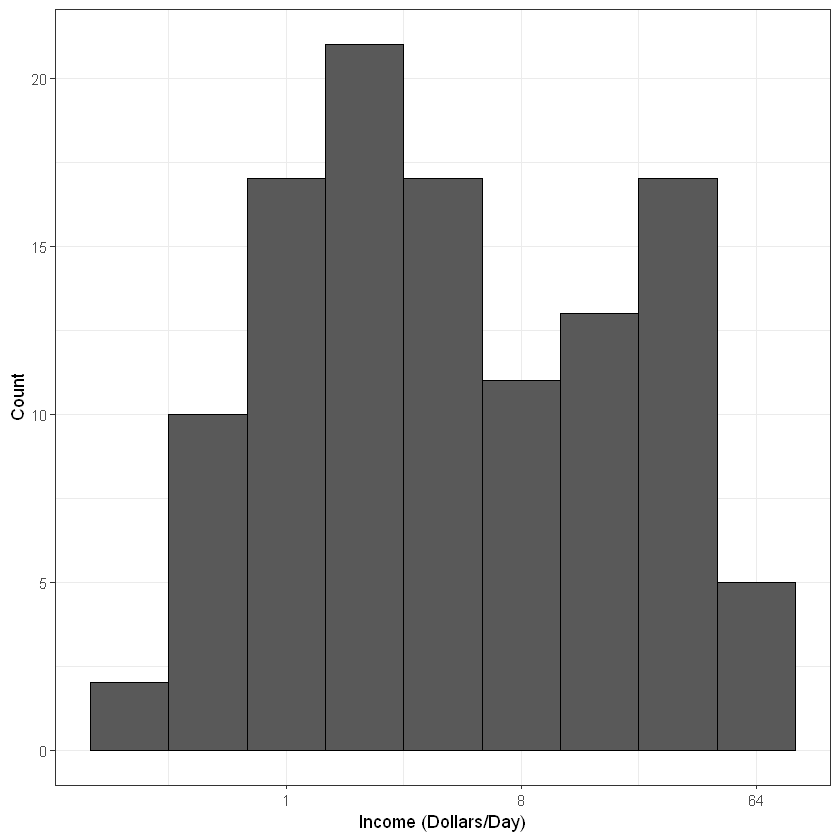

In [21]:
past_year <- 1970
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2") +
    xlab("Income (Dollars/Day)") +
    ylab("Count")

[1] 22

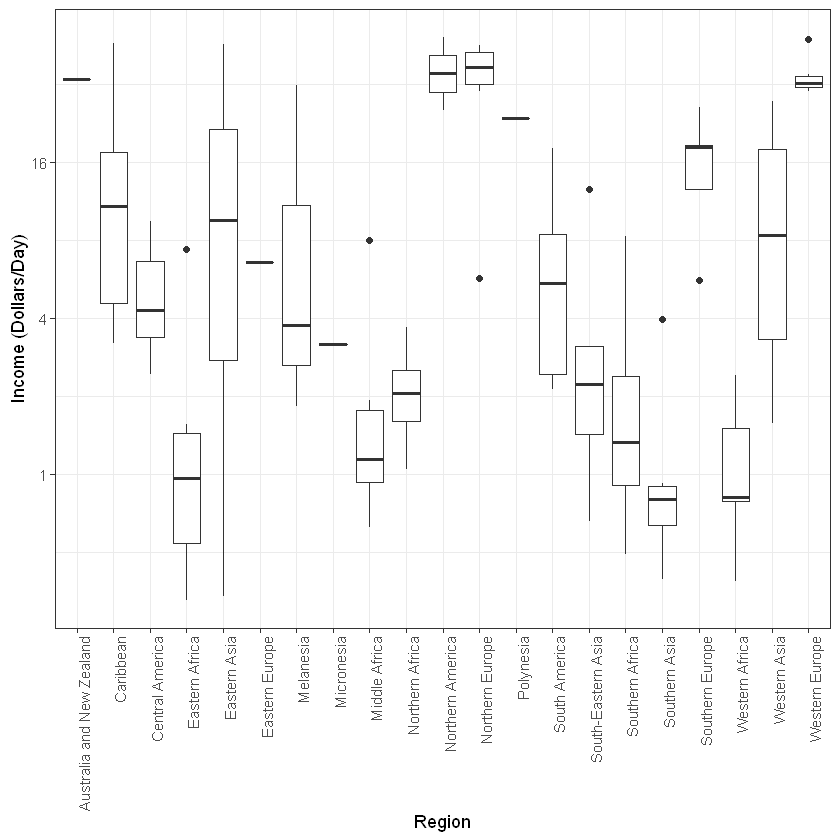

In [22]:
# Add dollars_per_day or Income per day Variable/Column to the data
gapminder <- gapminder %>% mutate(dollars_per_day = gdp/population/365)

# Number of regions 
length(levels(gapminder$region))

# Plot Boxplot
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    ggplot(aes(region, dollars_per_day)) +
    geom_boxplot() +
    scale_y_continuous(trans = "log2") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ylab("Income (Dollars/Day)") +
    xlab("Region")

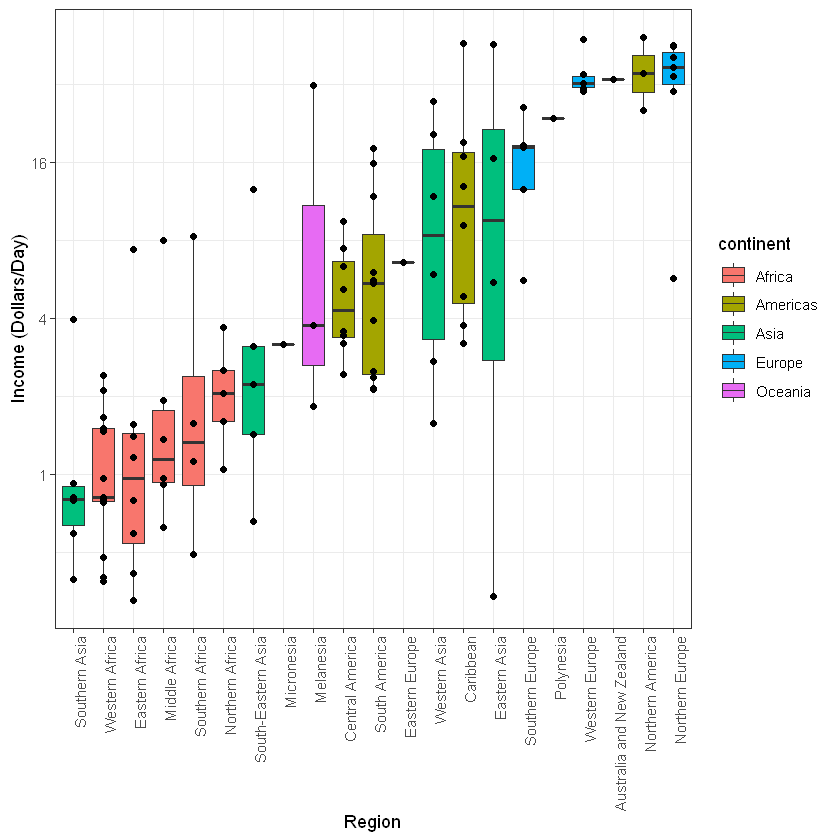

In [23]:
# Reorder and Color Regions for better comparison
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    # Reorder region by median income
    mutate(region = reorder(region, dollars_per_day, FUN = median)) %>%
    ggplot(aes(region, dollars_per_day, fill = continent)) +
    geom_boxplot() +
    scale_y_continuous(trans = "log2") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    geom_point(show.legend = FALSE) +
    ylab("Income (Dollars/Day)") +
    xlab("Region")

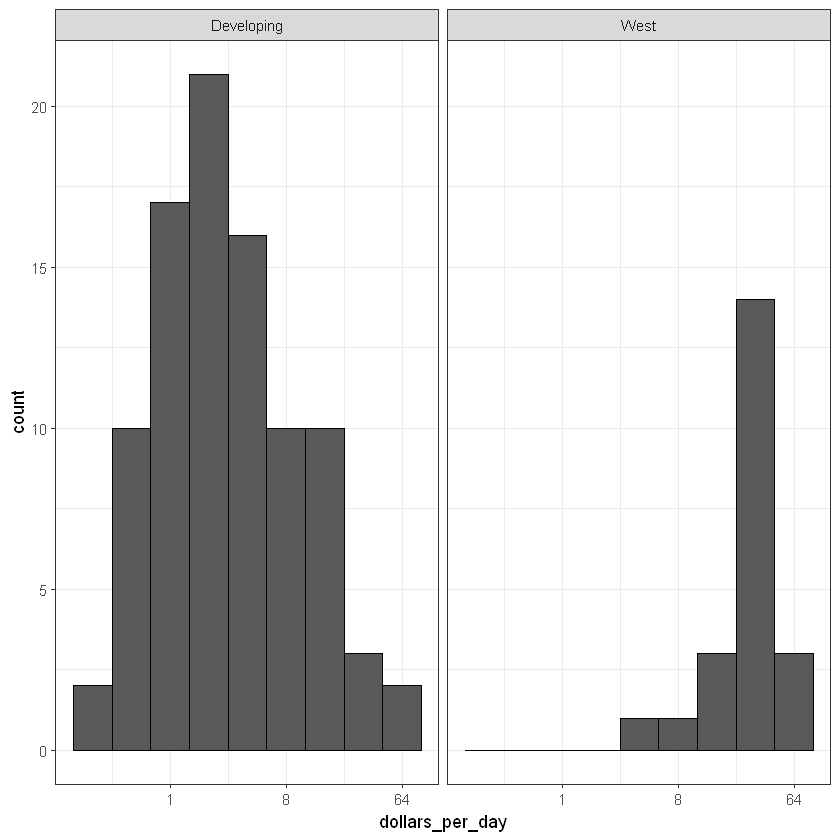

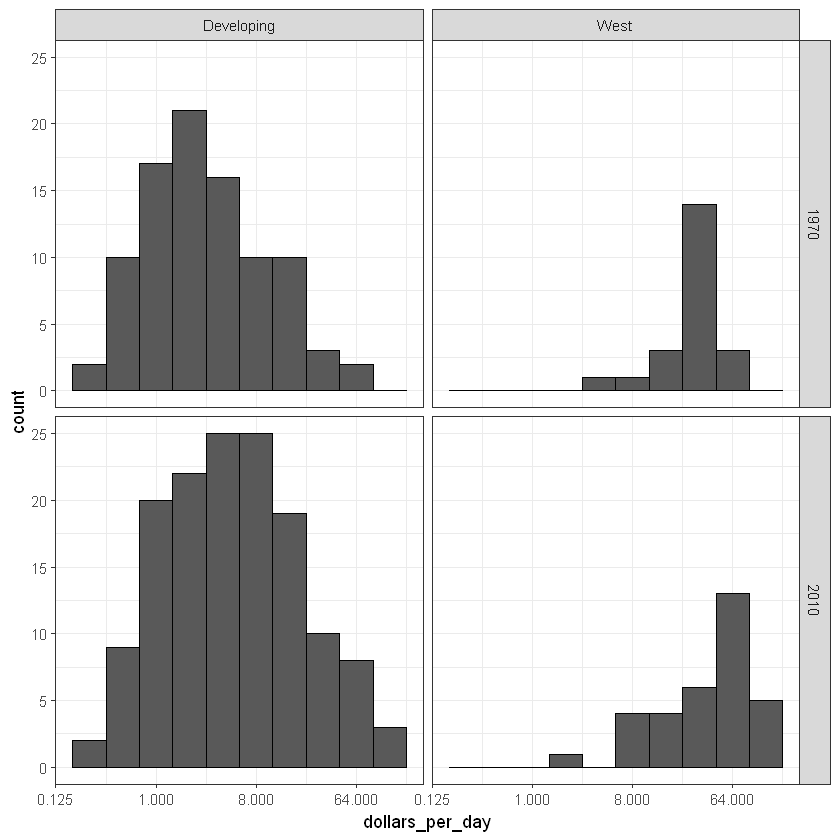

In [24]:
# add dollars per day variable and define past year
gapminder <- gapminder %>%
    mutate(dollars_per_day = gdp/population/365)
past_year <- 1970

# define Western countries
west <- c("Western Europe", "Northern Europe", "Southern Europe", "Northern America", "Australia and New Zealand")

# facet by West vs devloping
gapminder %>%
    filter(year == past_year & !is.na(gdp)) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2") +
    facet_grid(. ~ group)

# facet by West/developing and year
present_year <- 2010
gapminder %>%
    filter(year %in% c(past_year, present_year) & !is.na(gdp)) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2") +
    facet_grid(year ~ group)

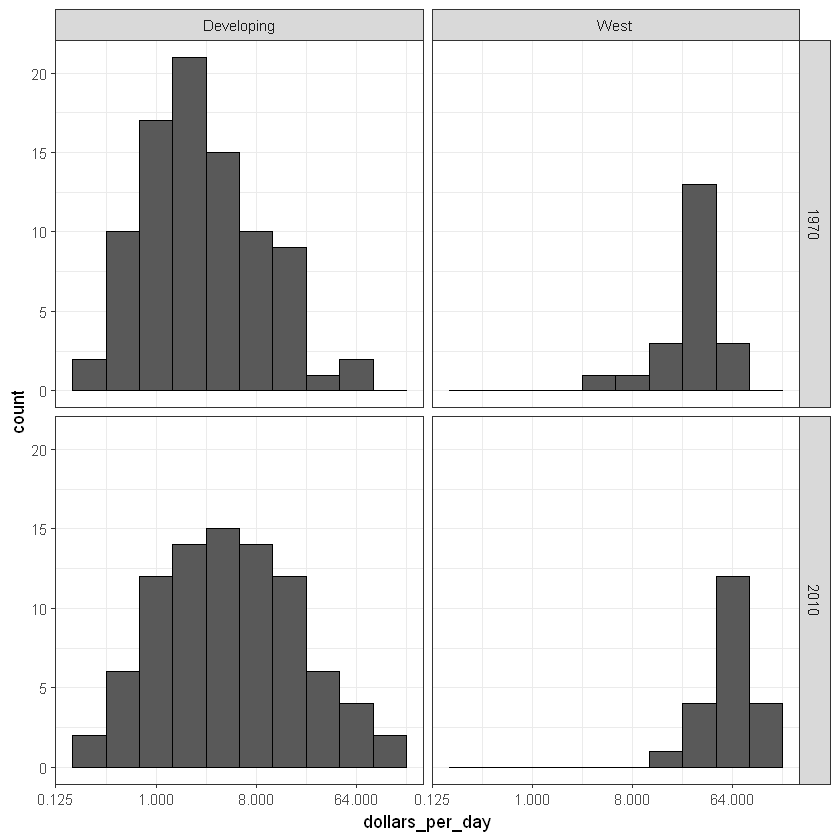

In [25]:
# define countries that have data available in both years
country_list_1 <- gapminder %>%
    filter(year == past_year & !is.na(dollars_per_day)) %>% .$country
    country_list_2 <- gapminder %>%
    filter(year == present_year & !is.na(dollars_per_day)) %>% .$country
    country_list <- intersect(country_list_1, country_list_2)

# make histogram including only countries with data available in both years
gapminder %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>%    # keep only selected countries
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day)) +
    geom_histogram(binwidth = 1, color = "black") +
    scale_x_continuous(trans = "log2") +
    facet_grid(year ~ group)

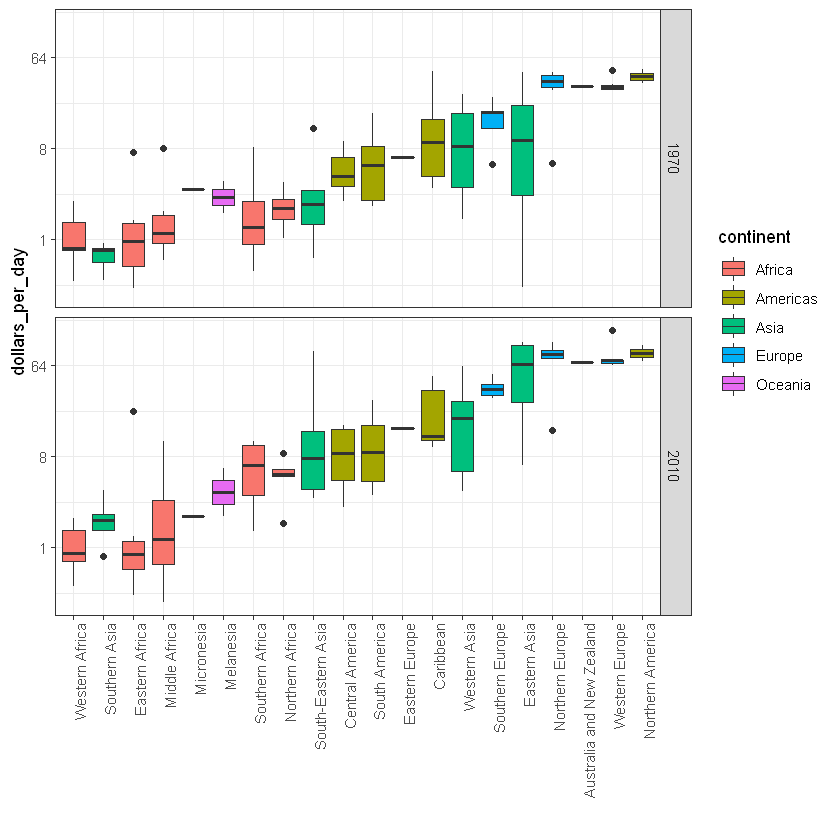

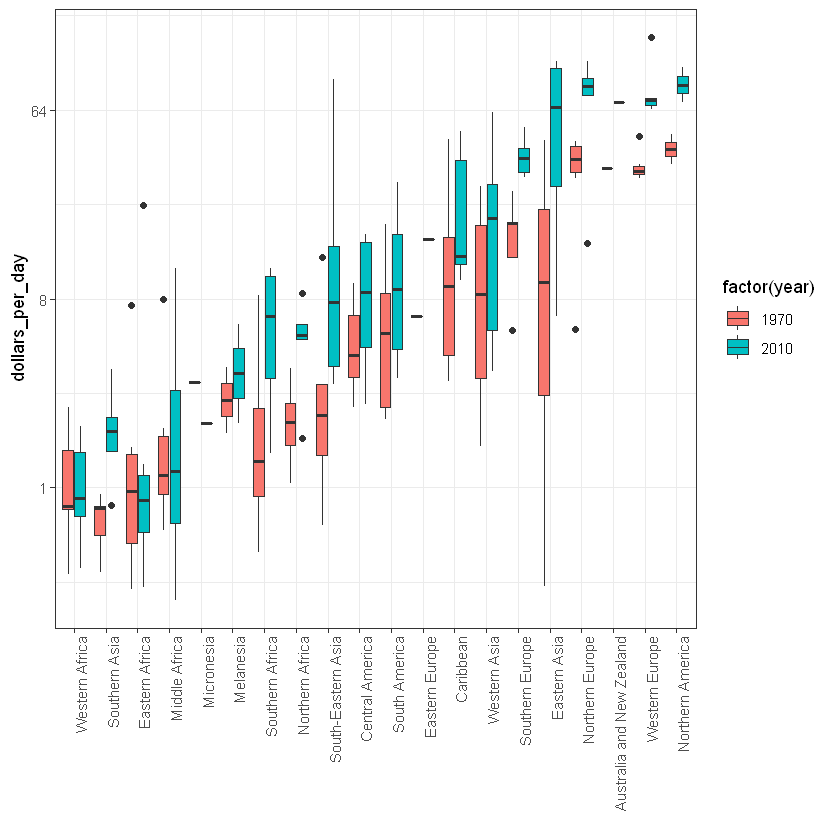

In [26]:
p <- gapminder %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    mutate(region = reorder(region, dollars_per_day, FUN = median)) %>%
    ggplot() +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    xlab("") + scale_y_continuous(trans = "log2")
    
 p + geom_boxplot(aes(region, dollars_per_day, fill = continent)) +
     facet_grid(year ~ .)
 
 # arrange matching boxplots next to each other, colored by year
 p + geom_boxplot(aes(region, dollars_per_day, fill = factor(year)))

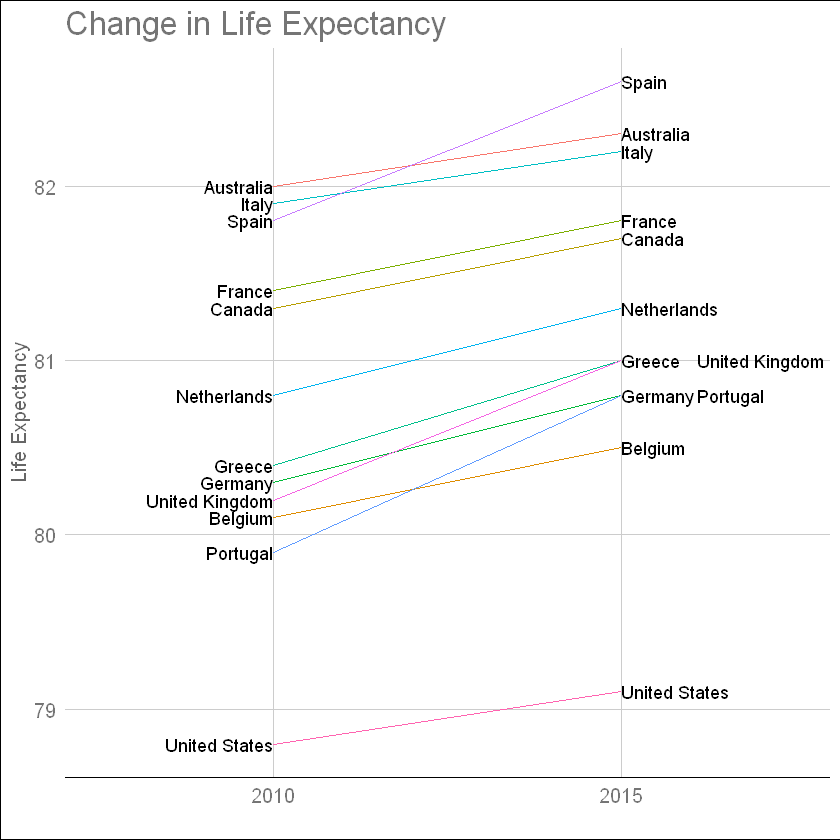

In [27]:
west <- c("Western Europe", "Northern Europe", "Southern Europe", "Northern America", "Australia and New Zealand")

dat <- gapminder %>%
    filter(year %in% c(2010, 2015) & region %in% west & !is.na(life_expectancy) & population > 10^7)

dat %>%
    mutate(location = ifelse(year == 2010, 1, 2),
           location = ifelse(year == 2015 & country %in% c("United Kingdom", "Portugal"),
                             location + 0.22, location),
           hjust = ifelse(year == 2010, 1, 0)) %>%
    mutate(year = as.factor(year)) %>%
    ggplot(aes(year, life_expectancy, group = country)) +
    geom_line(aes(color = country), show.legend = FALSE) +
    geom_text(aes(x = location, label = country, hjust = hjust), show.legend = FALSE) +
    xlab("") +
    ylab("Life Expectancy") +
    ggtitle("Change in Life Expectancy") +
    theme_gdocs()

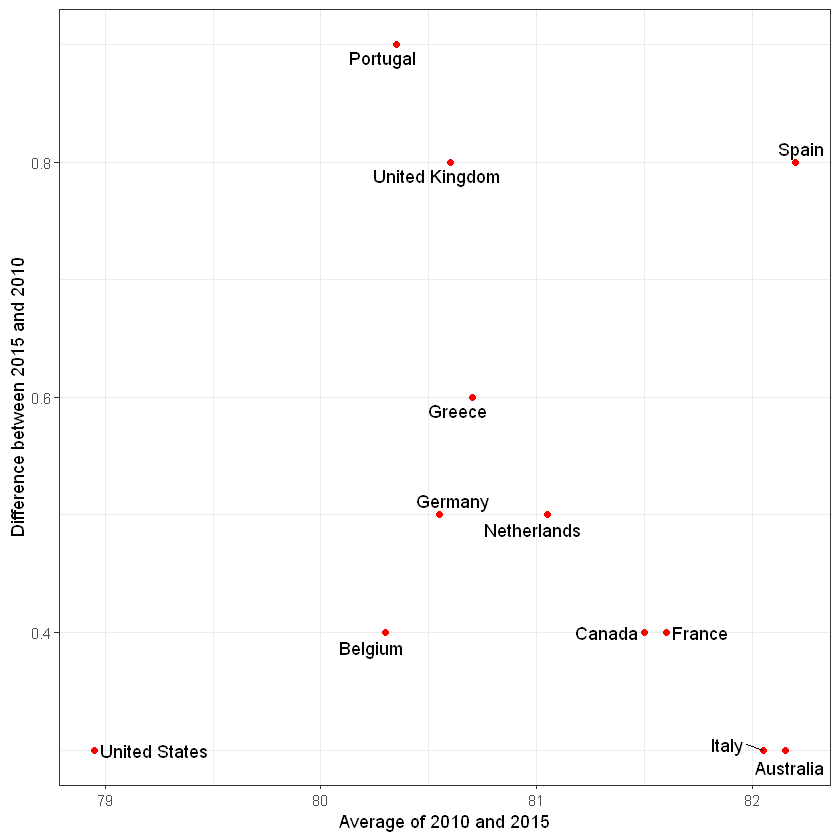

In [28]:
dat %>%
    mutate(year = paste0("life_expectancy_", year)) %>%
    select(country, year, life_expectancy) %>% spread(year, life_expectancy) %>%
    mutate(average = (life_expectancy_2015 + life_expectancy_2010)/2,
                difference = life_expectancy_2015 - life_expectancy_2010) %>%
    ggplot(aes(average, difference, label = country)) +
    geom_point(color = "red") +
    geom_text_repel() +
    geom_abline(lty = 2) +
    xlab("Average of 2010 and 2015") +
    ylab("Difference between 2015 and 2010")



|group      |  n|
|:----------|--:|
|Developing | 87|
|West       | 21|

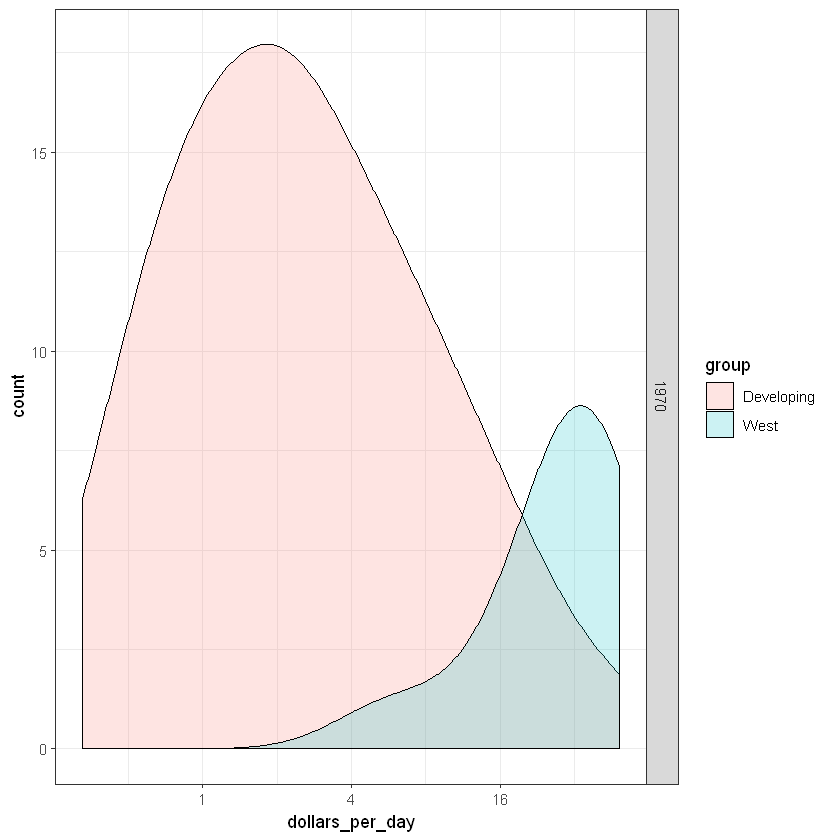

In [29]:
# see the code below the previous video for variable definitions

# smooth density plots - area under each curve adds to 1
gapminder %>%
    filter(year == past_year & country %in% country_list) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>% group_by(group) %>%
    summarize(n = n()) %>% knitr::kable()

# smooth density plots - variable counts on y-axis
p <- gapminder %>%
    filter(year == past_year & country %in% country_list) %>%
    mutate(group = ifelse(region %in% west, "West", "Developing")) %>%
    ggplot(aes(dollars_per_day, y = ..count.., fill = group)) +
    scale_x_continuous(trans = "log2")
p + geom_density(alpha = 0.2, bw = 0.75) + facet_grid(year ~ .)


In [30]:
# add group as a factor, grouping regions
gapminder <- gapminder %>%
    mutate(group = case_when(
            .$region %in% west ~ "West",
            .$region %in% c("Eastern Asia", "South-Eastern Asia") ~ "East Asia",
            .$region %in% c("Caribbean", "Central America", "South America") ~ "Latin America",
            .$continent == "Africa" & .$region != "Northern Africa" ~ "Sub-Saharan Africa",
            TRUE ~ "Others"))

# reorder factor levels
gapminder <- gapminder %>%
    mutate(group = factor(group, levels = c("Others", "Latin America", "East Asia", "Sub-Saharan Africa", "West")))


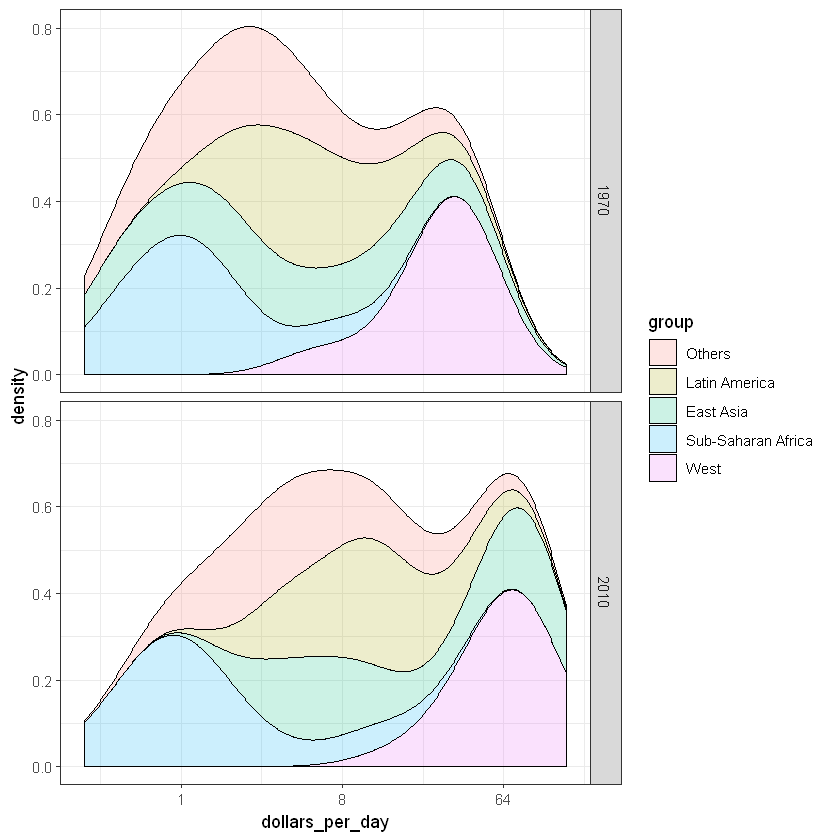

In [31]:
# note you must redefine p with the new gapminder object first
p <- gapminder %>%
  filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    ggplot(aes(dollars_per_day, fill = group)) +
    scale_x_continuous(trans = "log2")

# stacked density plot
p + geom_density(alpha = 0.2, bw = 0.75, position = "stack") +
    facet_grid(year ~ .)

Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not get true density"Warning message in density.default(x, weights = w, bw = bw, adjust = adjust, kernel = kernel, :
"sum(weights) != 1  -- will not ge

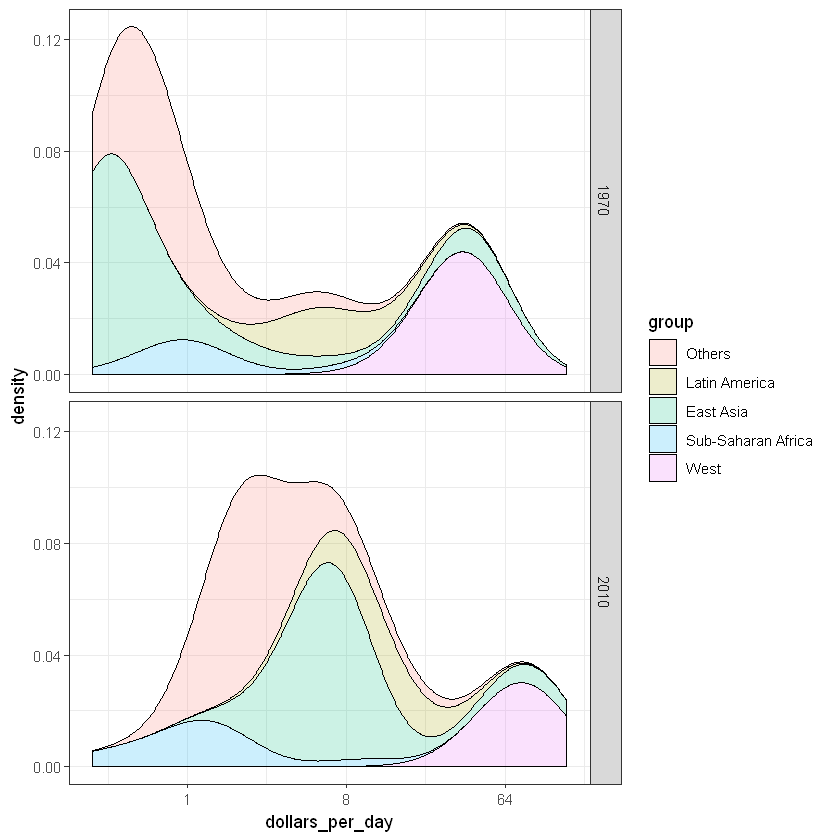

In [32]:
# weighted stacked density plot
gapminder %>%
    filter(year %in% c(past_year, present_year) & country %in% country_list) %>%
    group_by(year) %>%
    mutate(weight = population/sum(population*2)) %>%
    ungroup() %>%
    ggplot(aes(dollars_per_day, fill = group, weight = weight)) +
    scale_x_continuous(trans = "log2") +
    geom_density(alpha = 0.2, bw = 0.75, position = "stack") + facet_grid(year ~ .)

The plot clearly shows how an improvement in life expectancy followed the drops in fertility
rates. In 1960, Germans lived 15 years longer than South Koreans, although by 2010 the
gap is completely closed. It exemplifies the improvement that many non-western countries
have achieved in the last 40 years.